###Connect to google drive and load the data

In [ ]:
#Connect to google drive and load the data
from google.colab import drive
drive.mount('/content/gdrive')  

Mounted at /content/gdrive


###Install required libraries

In [ ]:
!pip install pandas-profiling==2.7.1 
import matplotlib.pyplot as plt

     |████████████████████████████████| 252 kB 5.2 MB/s 
     |████████████████████████████████| 3.1 MB 54.6 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
     |████████████████████████████████| 675 kB 40.7 MB/s 
     |████████████████████████████████| 812 kB 56.6 MB/s 
     |████████████████████████████████| 28.5 MB 1.9 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=6ab37b2a4e37c5aa98b97e3c2a7ca13c1e15527770c5d11c325e46c9b7bbf0c2
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=52b52eecf608ff45129ac8d3256bb3ec4a0c1b094b1b725aa1b2c837915f7f9f
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

###Load the ANZ synthesised transaction dataset

In [ ]:
import pandas as pd

df_transactions = pd.read_excel (r'/content/gdrive/My Drive/ANZ synthesised transaction dataset.xlsx',)
print (df_transactions)

           status  card_present_flag  ... merchant_long_lat movement
0      authorized                1.0  ...     153.38 -27.99    debit
1      authorized                0.0  ...     151.21 -33.87    debit
2      authorized                1.0  ...     151.21 -33.87    debit
3      authorized                1.0  ...     153.05 -26.68    debit
4      authorized                1.0  ...     153.44 -28.06    debit
...           ...                ...  ...               ...      ...
12038  authorized                0.0  ...     145.23 -37.81    debit
12039  authorized                1.0  ...     150.88 -33.96    debit
12040  authorized                1.0  ...     150.92 -33.74    debit
12041  authorized                1.0  ...     145.09 -37.91    debit
12042  authorized                1.0  ...     151.19 -33.93    debit

[12043 rows x 23 columns]


In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport

profile_trans = ProfileReport(df_transactions)
profile_trans

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###Average transaction amount per day

In [ ]:
Transamt_date = df_transactions.groupby(pd.Grouper(key='date',freq='D'))["amount"].mean()

In [ ]:
Transamt_date

date
2018-08-01    218.014161
2018-08-02    143.331053
2018-08-03    242.653376
2018-08-04     53.356356
2018-08-05     44.265000
                 ...    
2018-10-27     50.155252
2018-10-28     59.007762
2018-10-29    377.932745
2018-10-30    247.891461
2018-10-31    155.795248
Freq: D, Name: amount, Length: 92, dtype: float64

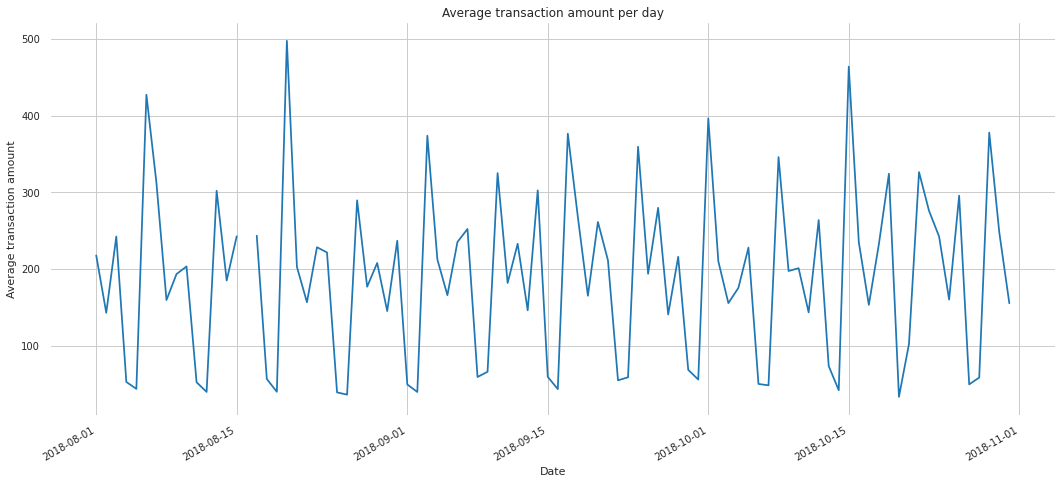

In [ ]:
plt.figure()

Transamt_date.plot.line(figsize=(18, 8), title = "Average transaction amount per day", xlabel="Date", ylabel="Average transaction amount", x_compat=True)
plt.grid()

## Total number of transaction done each day

In [ ]:
total_tran = df_transactions["date"].value_counts()
total_tran

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

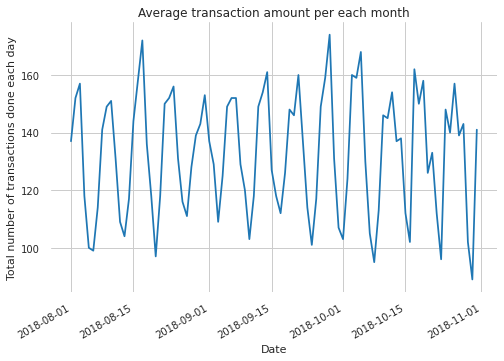

In [ ]:
plt.figure()
total_tran.plot.line(title = "Average transaction amount per each month", xlabel="Date", ylabel="Total number of transactions done each day")
plt.grid()

## Total transaction amount per month

In [ ]:
Transamt_mon = df_transactions.groupby(pd.Grouper(key='date',freq='M'))["amount"].sum()
Transamt_mon

date
2018-08-31    729935.52
2018-09-30    730550.21
2018-10-31    802798.47
Freq: M, Name: amount, dtype: float64

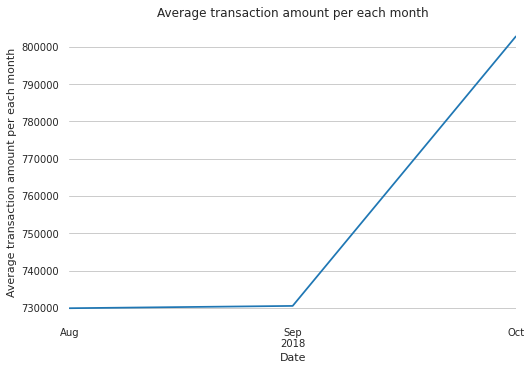

In [ ]:
plt.figure()
Transamt_mon.plot.line(title = "Average transaction amount per each month", xlabel="Date", ylabel="Average transaction amount per each month")
plt.grid()


###Average transaction amount per month

In [ ]:
Transamt_mon = df_transactions.groupby(pd.Grouper(key='date',freq='M'))["amount"].mean()
Transamt_mon

date
2018-08-31    185.121867
2018-09-30    182.045903
2018-10-31    196.427323
Freq: M, Name: amount, dtype: float64

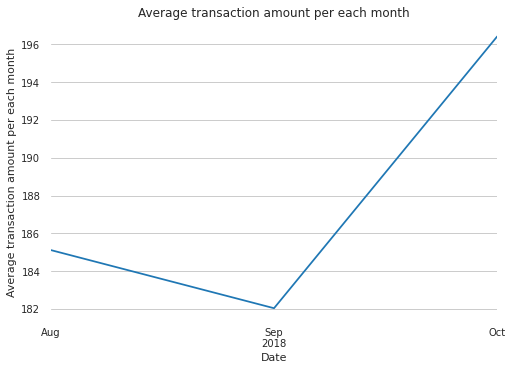

In [ ]:
plt.figure()
Transamt_mon.plot.line(title = "Average transaction amount per each month", xlabel="Date", ylabel="Average transaction amount per each month")
plt.grid()


## Total number of transactions done each month

In [ ]:
Transcount_mon = df_transactions.groupby(pd.Grouper(key='date',freq='M')).count()
Transcount_mon["status"]

date
2018-08-31    3943
2018-09-30    4013
2018-10-31    4087
Freq: M, Name: status, dtype: int64

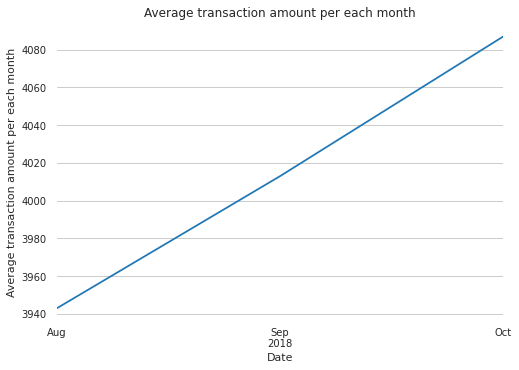

In [ ]:
plt.figure()
Transcount_mon["status"].plot.line(title = "Average transaction amount per each month", xlabel="Date", ylabel="Average transaction amount per each month")
plt.grid()

## Transaction volume by gender

In [ ]:
df_tran_gender = df_transactions.groupby(["date","gender"])["amount"].mean().reset_index()
df_tran_gender

,date,gender,amount
0,2018-08-01,F,191.952676
1,2018-08-01,M,246.050000
2,2018-08-02,F,85.452899
3,2018-08-02,M,191.446627
4,2018-08-03,F,216.349241
...,...,...,...
177,2018-10-29,M,470.635957
178,2018-10-30,F,251.164773
179,2018-10-30,M,244.690889
180,2018-10-31,F,198.612319


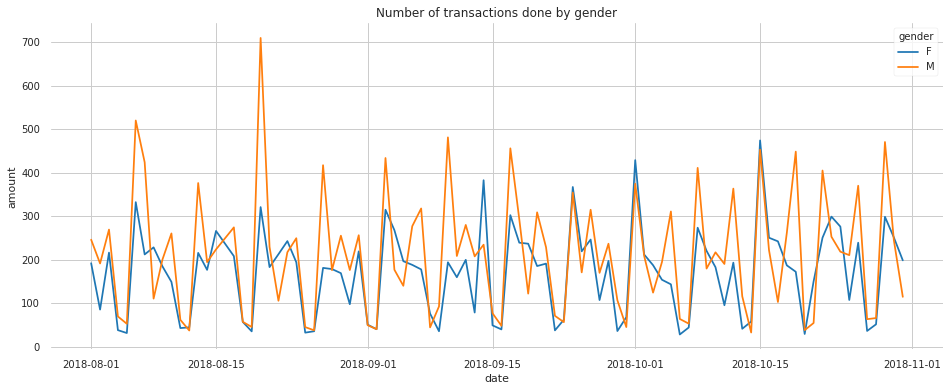

In [ ]:
plt.figure(figsize=(16, 6))
plt.grid()
plt.title("Number of transactions done by gender")
sns.lineplot(y="amount",x="date",hue="gender", data=df_tran_gender)


## Transaction volume by age

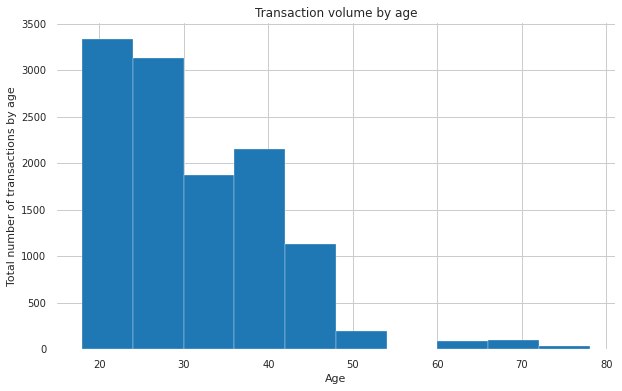

In [ ]:
plt.figure(figsize=(10, 6))
plt.gca().set(frame_on=False)
plt.hist(df_transactions["age"], bins=10)
plt.title("Transaction volume by age")
plt.xlabel("Age")
plt.ylabel("Total number of transactions by age")
plt.grid()
plt.show()

## Total number of transaction per each day of week

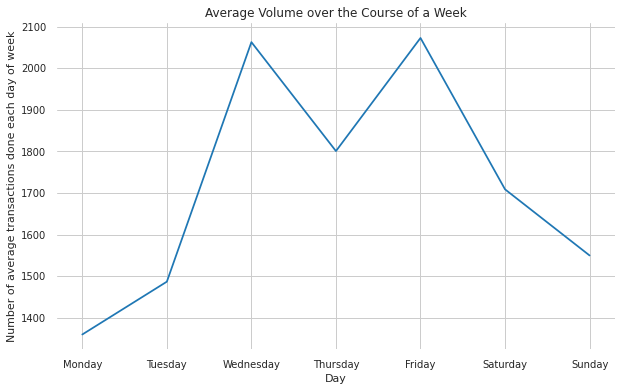

In [ ]:
plt.figure(figsize=(10,6))
g=sns.lineplot(x=df_transactions['date'].dt.weekday,y=df_transactions['account'].count().mean(),estimator='count',ci=None)
labels=[0,'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
g.set_xticklabels(labels)
plt.title('Average Volume over the Course of a Week')
plt.xlabel('Day')
plt.ylabel('Number of average transactions done each day of week')
plt.grid()

## Number of transactions made in each merchant suburb

In [ ]:
text = " ".join(review for review in df_transactions.merchant_suburb.astype(str))
print ("There are {} words in the combination of all cells in column BLOOM.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(["nan"])


There are 97974 words in the combination of all cells in column BLOOM.


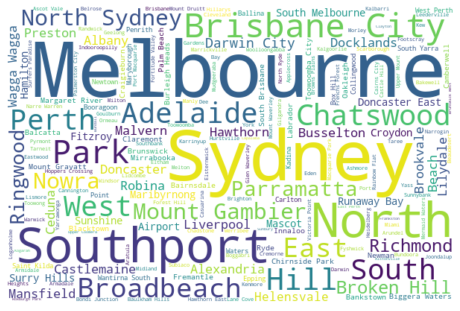

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=600, height=400).generate(text)
plt.axis("off")
#plt.figure( figsize=(30,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()